In [117]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

#From sklearn lib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [44]:
#loading claimants data
claimants=pd.read_csv("claimants.csv")
print(claimants.head(5))
#dropping first column
claimants.drop(["CASENUM"],inplace=True,axis=1)
#cat_cols = ["ATTORNEY","CLMSEX","SEATBELT","CLMINSUR"]
#cont_cols = ["CLMAGE","LOSS"]
# Getting the barplot for the categorical columns

   CASENUM  ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
0        5         0     0.0       1.0       0.0    50.0  34.940
1        3         1     1.0       0.0       0.0    18.0   0.891
2       66         1     0.0       1.0       0.0     5.0   0.330
3       70         0     0.0       1.0       1.0    31.0   0.037
4       96         1     0.0       1.0       0.0    30.0   0.038


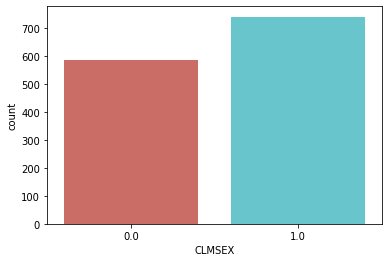

In [41]:
sb.countplot(x='CLMSEX',data=claimants,palette="hls")

AxesSubplot(0.125,0.125;0.775x0.755)


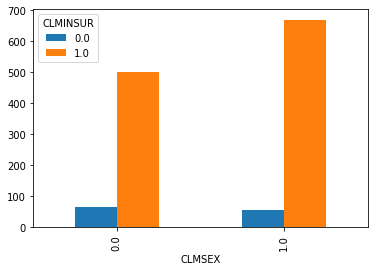

In [46]:
print(pd.crosstab(claimants.CLMSEX,claimants.CLMINSUR).plot(kind="bar"))

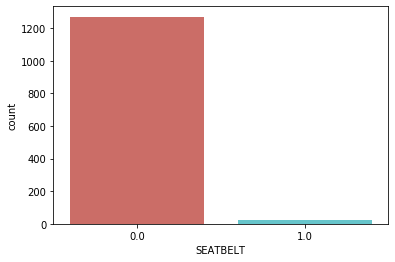

In [42]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")

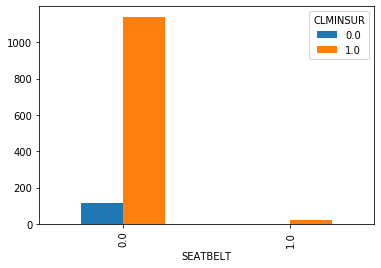

In [47]:
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")

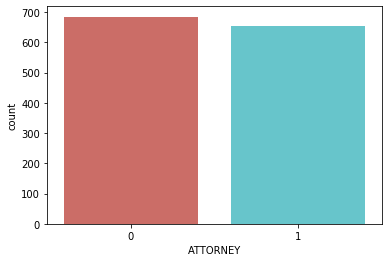

In [43]:
sb.countplot(x='ATTORNEY',data=claimants,palette="hls")

AxesSubplot(0.125,0.125;0.775x0.755)


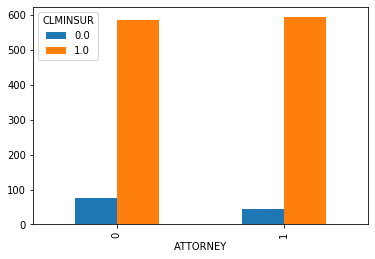

In [45]:
print(pd.crosstab(claimants.ATTORNEY,claimants.CLMINSUR).plot(kind="bar"))

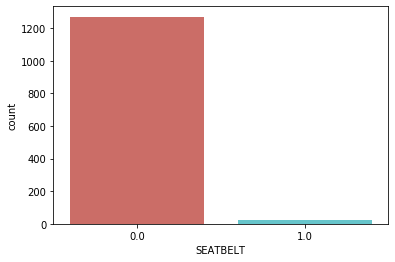

In [48]:
sb.countplot(x="SEATBELT",data=claimants,palette="hls")


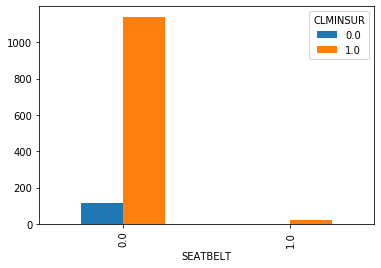

In [49]:
pd.crosstab(claimants.SEATBELT,claimants.CLMINSUR).plot(kind="bar")


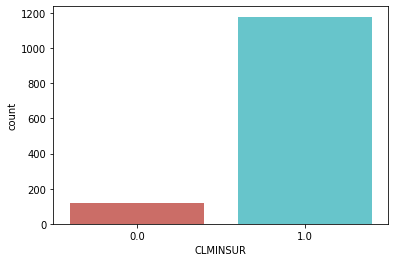

In [50]:
sb.countplot(x="CLMINSUR",data=claimants,palette="hls")

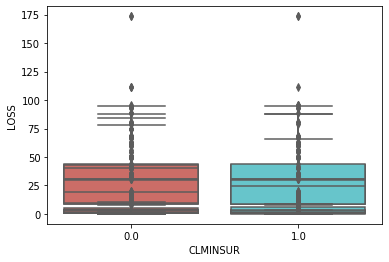

In [51]:
# Data Distribution - Boxplot of continuous variables wrt to each category of categorical columns
sb.boxplot(x="ATTORNEY",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="ATTORNEY",y="LOSS",data=claimants,palette="hls")
sb.boxplot(x="CLMSEX",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="CLMSEX",y="LOSS",data=claimants,palette="hls")
sb.boxplot(x="SEATBELT",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="SEATBELT",y="LOSS",data=claimants,palette="hls")
sb.boxplot(x="CLMINSUR",y="CLMAGE",data=claimants,palette="hls")
sb.boxplot(x="CLMINSUR",y="LOSS",data=claimants,palette="hls")

In [52]:
# To get the count of null values in the data 
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [53]:
claimants.shape 

(1340, 6)

In [55]:
# To drop null values ( dropping rows)
claimants.dropna().shape

(1096, 6)

In [60]:
claimants["CLMSEX"].fillna(1,inplace=True)
claimants["CLMINSUR"].fillna(1,inplace=True)
claimants["SEATBELT"].fillna(1,inplace=True)
claimants.CLMAGE.fillna(28.4144,inplace=True)

In [64]:
# Model building 
claimants.shape

(1340, 6)

In [101]:
X=claimants.iloc[:,[1,2,3,4,5]]
Y=claimants.iloc[:,0] #ATTORNEY
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state = 0)
classifier=LogisticRegression()
classifier.fit(x_train,y_train)

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
classifier.coef_ # coefficients of features 

array([[ 0.36672007,  0.59135233, -0.61963948,  0.00160172, -0.3082423 ]])

In [104]:
classifier.predict_proba (X) # Probability values 

array([[9.99960009e-01, 3.99910563e-05],
       [4.76856534e-01, 5.23143466e-01],
       [3.84764453e-01, 6.15235547e-01],
       ...,
       [2.76526658e-01, 7.23473342e-01],
       [6.52040157e-01, 3.47959843e-01],
       [3.17391329e-01, 6.82608671e-01]])

In [120]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [119]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.6537313432835821

In [122]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[108,  78],
       [ 38, 111]], dtype=int64)

In [124]:
accuracy = sum(y_test==y_pred)/claimants.shape[0]
pd.crosstab(y_pred,y_test)

ATTORNEY,0,1
row_0,,
0,108,38
1,78,111


In [125]:
new_df

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS,y_pred,0,1
0,0,0.0,1.0,0.0,50.0,34.940,0,0.999974,0.000026
1,1,1.0,0.0,0.0,18.0,0.891,1,0.483889,0.516111
2,1,0.0,1.0,0.0,5.0,0.330,1,0.395718,0.604282
3,0,0.0,1.0,1.0,31.0,0.037,1,0.462172,0.537828
4,1,0.0,1.0,0.0,30.0,0.038,1,0.360544,0.639456
...,...,...,...,...,...,...,...,...,...
1335,1,0.0,1.0,0.0,1.0,0.576,1,0.416865,0.583135
1336,0,1.0,1.0,0.0,46.0,3.705,0,0.561688,0.438312
1337,1,1.0,1.0,0.0,39.0,0.099,1,0.291208,0.708792
1338,0,1.0,0.0,0.0,8.0,3.177,0,0.665782,0.334218
